<a href="https://colab.research.google.com/github/mzaman202006/CancerPrediction/blob/main/Predicting_Breast_Cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score

df = pd.read_csv('data.csv')
del df['Unnamed: 32']

cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)


cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)
df.columns



Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [9]:

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
md = Sequential()

In [11]:

md.add(Dense(units=8, kernel_initializer='normal', activation='relu', input_dim=16))

md.add(Dropout(rate=0.1))


md.add(Dense(units=8, kernel_initializer='normal', activation='relu'))

md.add(Dropout(rate=0.1))
md.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

md.add(Dense(units=1, kernel_initializer='normal', activation='sigmoid'))

md.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5469
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6367
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.6328
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6406
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.6543
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6504
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.6660
Epoch 8/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.6973
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.7402
Epoch 10/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.7695
Epoch 11/150
6/6 [===========

In [12]:

y_pred = md.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("accuracy  {}%".format(((cm[0][0] + cm[1][1])/57)*100))

accuracy  94.73684210526315%


In [13]:
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
score = f1_score(y_test, y_pred, average='binary')
print('Precision : ',precision *100 ,' %')
print('Recall : ' ,recall*100 ,' %') 
print('F1_score : ', score*100 ,' %')

Precision :  91.30434782608695  %
Recall :  95.45454545454545  %
F1_score :  93.33333333333333  %


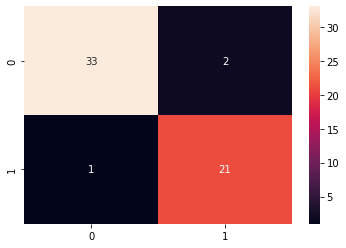

In [14]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')